# Capstone Project: Electromobility Data Analysis

## 1. Introduction and Objective

Climate change is one of the greatest threats of the 21st century. It poses a risk to both the natural environment and human society. Climate change is associated with more frequent weather extremes, water and food shortages and the loss of ecosystems. The main driver of climate change is the emission of greenhouse gases (GHG). Since 1850, anthropogenic GHG emissions have increased due to economic and population growth. The main source of anthropogenic GHG emissions is the burning of fossil fuels for energy production. [1] The European Union's energy policy aims to reduce GHG emissions by at least 55% by 2030 compared to 1990 levels. The Paris Agreement aims to limit global warming to below 2°C and pursues efforts to limit warming to 1.5°C. In 2020, road transport accounted for 24% of the EU's total emissions of carbon dioxide (CO2), the main greenhouse gas. The largest share of transport emissions (60% in 2022) comes from passenger cars. Compared to other sectors, the transport sector has not shown the same reduction in greenhouse gas emissions since 1990. Therefore, the use of low-emission alternative energy sources in the transport sector needs to be increased. The further spread of electric mobility can play a crucial role in the reduction of GHG emissions, if the electric power is generated by renewable energy sources [1,2].

This project focuses on the global trade and distribution of electric vehicles in recent years. The following questions will be answered.

**Analysis Questions**:
1. What is the global distribution of EV sales and stocks by powertrain type (BEV (battery electric vehicle), PHEV (plug-in hybrid electric vehicle), FCEV (fuel cell electric vehicle))?
2. How are EV sales and stocks distributed across different modes (cars, buses, vans, trucks) worldwide?
3. How have EV car sales and stocks developed since 2010 for different regions?
4. How are sales and stocks of EV cars (BEV and PHEV) distributed across countries in 2023 and in recent years?
7. What is the relationship between the number of public charging points, electric car sales and stocks?

## 2. Data Cleaning and Preparation

In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import pymysql
import statsmodels.api as sm 

In [117]:
electromobility_df=pd.read_csv('IEA Global EV Data 2024.csv') # Source: [3] 

**Data dictionary**:

|column name|content of column| values|
|--------|-------|-------|
|region|country, region or global| individual coountries, regions (EU27, Europe (Europe includes the EU27, Norway, Iceland, Switzerland and United Kingdom), Rest of the world) or World|
|category|historical data or forecasts| Historical, Projection-STEPS (Stated Policies Scenario), Projection-APS (Announced Pledges Scenario)|
|parameter|parameter of the value |EV stock (EVs on the road), EV stock share, EV sales (New Electric car registration), EV sales share, EV charging points|
|mode|differentation of vehicle types|Cars, EV (electric vehicles), Buses, Vans, Trucks|
|powertrain|differentation of powertrain types |EV (electric vehicle), BEV (battery electric vehicle), PHEV (plug-in hybrid electric vehicle), FCEV (fuel cell electric vehicle)|
|year|historical years and forecast|historical (2010-2023), forecast for 2025, 2030 and 2035|
|unit|definition of the unit of the value column|percent, number of vehicles, number of charging points|
|value|values of the corresponding parameter||

In [119]:
electromobility_df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [120]:
#12654 rows without any missing values
electromobility_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB


In [121]:
# Check for missing data: the data set is complete
electromobility_df.isnull().any().sum()

0

In [122]:
# check for diplicates: there are no duplicates
electromobility_df.duplicated().any()

False

In [123]:
# Check the different parameters to which the values relate
electromobility_df.parameter.unique()

array(['EV stock share', 'EV sales share', 'EV sales', 'EV stock',
       'EV charging points', 'Electricity demand', 'Oil displacement Mbd',
       'Oil displacement, million lge'], dtype=object)

In [124]:
# Splitting the DataFrame 'electromobility_df' into one DataFrame for each relevant parameter

# Create DataFrame for EV Sales
EV_sales=electromobility_df[electromobility_df['parameter']=='EV sales']
EV_sales=EV_sales.drop('parameter', axis=1)
EV_sales=EV_sales.drop('unit', axis=1)
EV_sales=EV_sales.rename(columns={"value": "number of vehicles"})

# Create DataFrame for EV Sales Share
EV_sales_share=electromobility_df[electromobility_df['parameter']=='EV sales share']
EV_sales_share=EV_sales_share.drop('parameter', axis=1)
EV_sales_share=EV_sales_share.drop('unit', axis=1)
EV_sales_share=EV_sales_share.rename(columns={"value": "percent of vehicles"})

# Create DataFrame for EV Stock
EV_stock=electromobility_df[electromobility_df['parameter']=='EV stock']
EV_stock=EV_stock.drop('parameter', axis=1)
EV_stock=EV_stock.drop('unit', axis=1)
EV_stock=EV_stock.rename(columns={"value": "number of vehicles"})

# Create DataFrame for EV Stock Share
EV_stock_share=electromobility_df[electromobility_df['parameter']=='EV stock share']
EV_stock_share=EV_stock_share.drop('parameter', axis=1)
EV_stock_share=EV_stock_share.drop('unit', axis=1)
EV_stock_share=EV_stock_share.rename(columns={"value": "percent of vehicles"})

# Create DataFrame for EV Charging Points
EV_charging_points=electromobility_df[electromobility_df['parameter']=='EV charging points']
EV_charging_points=EV_charging_points.drop('parameter', axis=1)
EV_charging_points=EV_charging_points.drop('unit', axis=1)
EV_charging_points=EV_charging_points.rename(columns={"value": "number of charging points"})

In [125]:
EV_sales.head()

,region,category,mode,powertrain,year,number of vehicles
2,Australia,Historical,Cars,BEV,2011,49.0
5,Australia,Historical,Cars,BEV,2012,170.0
9,Australia,Historical,Cars,PHEV,2012,80.0
10,Australia,Historical,Cars,PHEV,2013,100.0
14,Australia,Historical,Cars,BEV,2013,190.0


**Using MySQL as Database**

In [127]:
# Export as csv file, then import it into the MySQL database 'electromobility_db'

# EV_sales.to_csv('EV_sales.csv')
# EV_sales_share.to_csv('EV_sales_share.csv')
# EV_stock.to_csv('EV_stock.csv')
# EV_stock_share.to_csv('EV_stock_share.csv')

In [128]:
# Screenshot of MySQL Workbench:

![Picture of MySQL Database electromobility_db](electromobility_db.png "electromobility_db")

In [130]:
# Connecting to the MySQL database 'electromobility_db'
# conn=pymysql.connect(host='localhost', port=int(3306), user='root', passwd='*********', db='electromobility_db')

In [131]:
# Calling the table EV_sales from MYSQL for chapter 3.1
# EV_sales_h_gl=pd.read_sql_query('SELECT * FROM ev_sales WHERE EV_sales_category="Historical" AND EV_sales_region="World"', conn)

## 3. Explorative Data Analysis

**3.1 Distribution of EV Sales and Stock of Different Powertrain Types**

 What is the global distribution of EV sales and stocks by powertrain type (BEV (battery electric vehicle), PHEV (plug-in hybrid electric vehicle), FCEV (fuel cell electric vehicle))?

In [135]:
# Focus on global and historical EV Sales
EV_sales_h_gl=EV_sales[(EV_sales['category']=='Historical')  & (EV_sales['region']=='World')] 
EV_sales_share_h_gl=EV_sales_share[(EV_sales_share['category']=='Historical')  & (EV_sales_share['region']=='World')]
EV_stock_h_gl=EV_stock[(EV_stock['category']=='Historical')  & (EV_stock['region']=='World')]
EV_stock_share_h_gl=EV_stock_share[(EV_stock_share['category']=='Historical')  & (EV_stock_share['region']=='World')]
EV_stock_h_gl.head()

,region,category,mode,powertrain,year,number of vehicles
11409,World,Historical,Vans,BEV,2010,7100.0
11411,World,Historical,Vans,FCEV,2010,6.0
11412,World,Historical,Vans,PHEV,2010,210.0
11413,World,Historical,Cars,FCEV,2010,45.0
11416,World,Historical,Cars,BEV,2010,20000.0


In [136]:
# Create pivot table for differentiation of powertrains for EV Sales and EV Stock
EV_sales_h_gl_powertrain_pivot = EV_sales_h_gl.pivot_table(index=['region', 'category', 'mode', 'year'], columns='powertrain', values='number of vehicles').reset_index()
EV_sales_h_gl_powertrain_pivot =EV_sales_h_gl_powertrain_pivot.groupby('year')[['BEV', 'PHEV','FCEV']].sum()

EV_stock_h_gl_powertrain_pivot = EV_stock_h_gl.pivot_table(index=['region', 'category', 'mode', 'year'], columns='powertrain', values='number of vehicles').reset_index()
EV_stock_h_gl_powertrain_pivot =EV_stock_h_gl_powertrain_pivot.groupby('year')[['BEV', 'PHEV','FCEV']].sum()
EV_stock_h_gl_powertrain_pivot.tail()

powertrain,BEV,PHEV,FCEV
year,,,
2019,5830000.0,2439888.0,24070.0
2020,7970000.0,3443110.0,33600.0
2021,12390000.0,5345450.0,51760.0
2022,19770000.0,8049920.0,72000.0
2023,30280000.0,12055300.0,88900.0


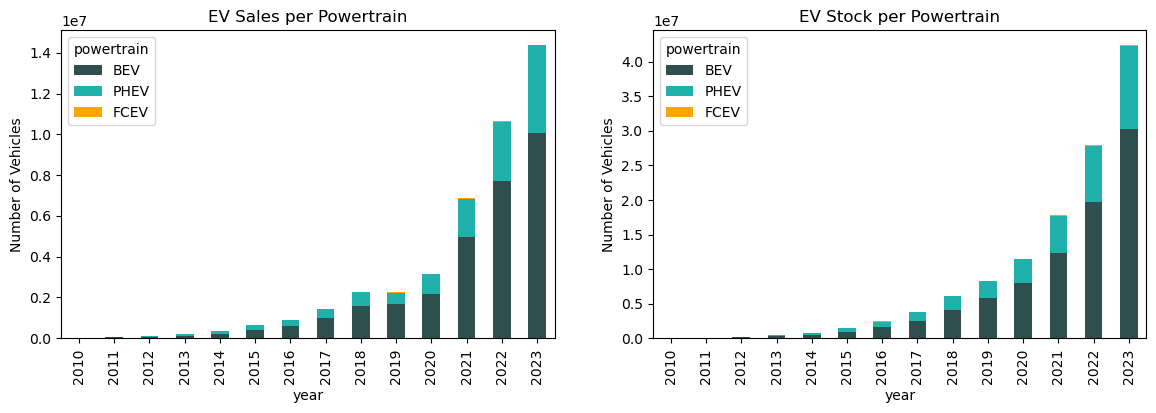

In [297]:
fig, ax= plt.subplots (1,2, figsize=(14,4))
EV_sales_h_gl_powertrain_pivot.plot(kind='bar',ax=ax[0], stacked=True, color=['darkslategrey', 'lightseagreen', 'orange'])
ax[0].set_title('EV Sales per Powertrain')
ax[0].set_ylabel('Number of Vehicles')
EV_stock_h_gl_powertrain_pivot.plot(kind='bar',ax=ax[1], stacked=True, color=['darkslategrey', 'lightseagreen', 'orange'])
ax[1].set_title('EV Stock per Powertrain')
ax[1].set_ylabel('Number of Vehicles')
plt.show()

In [138]:
print(f'EVs sold in 2023: {EV_sales_h_gl_powertrain_pivot[EV_sales_h_gl_powertrain_pivot.index==2023].sum().sum()}')
print(f'EVs on the road in 2023: {EV_stock_h_gl_powertrain_pivot[EV_stock_h_gl_powertrain_pivot.index==2023].sum().sum()}')

EVs sold in 2023: 14385660.0
EVs on the road in 2023: 42424200.0


The Sales of EVs have been growing steadily and even more so since 2020. Around 14.4 million EVs were sold in 2023, resulting in an EV stock of around 42.4 million. Fully electric vehicles are the most popular, followed by plug-in hybrid electric vehicle. A plug-in hybrid is a motor vehicle with a hybrid drive whose drive battery can be charged both via a combustion engine and via a plug into the power grid, which makes it less dependent on charging infrastructure. However, PHEVs offer few climate or air quality benefits, because there is no guarantee that they will be driven electrically. [4] Fuel cell electric vehicles (FCEVs) are powered by hydrogen. FCEVs play a minor role, as they are still at the research stage and there is a lack of refuelling infrastructure. [5] 
The increase in electric vehicles is necessary to decarbonise the transport sector.

**3.2 Distribution of EV Sales and Stock of Different Modes**

How are EV sales and stocks distributed across different modes (cars, buses, vans, trucks) worldwide?

In [142]:
# Create Pivot table for differentiation of modes
EV_sales_h_gl_mode_pivot = EV_sales_h_gl.pivot_table(index=['region', 'category', 'powertrain', 'year'], columns='mode', values='number of vehicles').reset_index()
EV_sales_h_gl_mode_pivot = EV_sales_h_gl_mode_pivot.groupby('year')[['Cars', 'Trucks','Buses','Vans']].sum()

EV_stock_h_gl_mode_pivot = EV_stock_h_gl.pivot_table(index=['region', 'category', 'powertrain', 'year'], columns='mode', values='number of vehicles').reset_index()
EV_stock_h_gl_mode_pivot = EV_stock_h_gl_mode_pivot.groupby('year')[['Cars', 'Trucks','Buses','Vans']].sum()
EV_stock_h_gl_mode_pivot.head()

mode,Cars,Trucks,Buses,Vans
year,,,,
2010,20445.0,1100.0,8506.0,7316.0
2011,67583.0,1300.0,11160.0,10266.0
2012,190110.0,1600.0,12680.0,21317.0
2013,390140.0,2400.0,15412.0,31426.0
2014,710210.0,2600.0,35561.0,43549.0


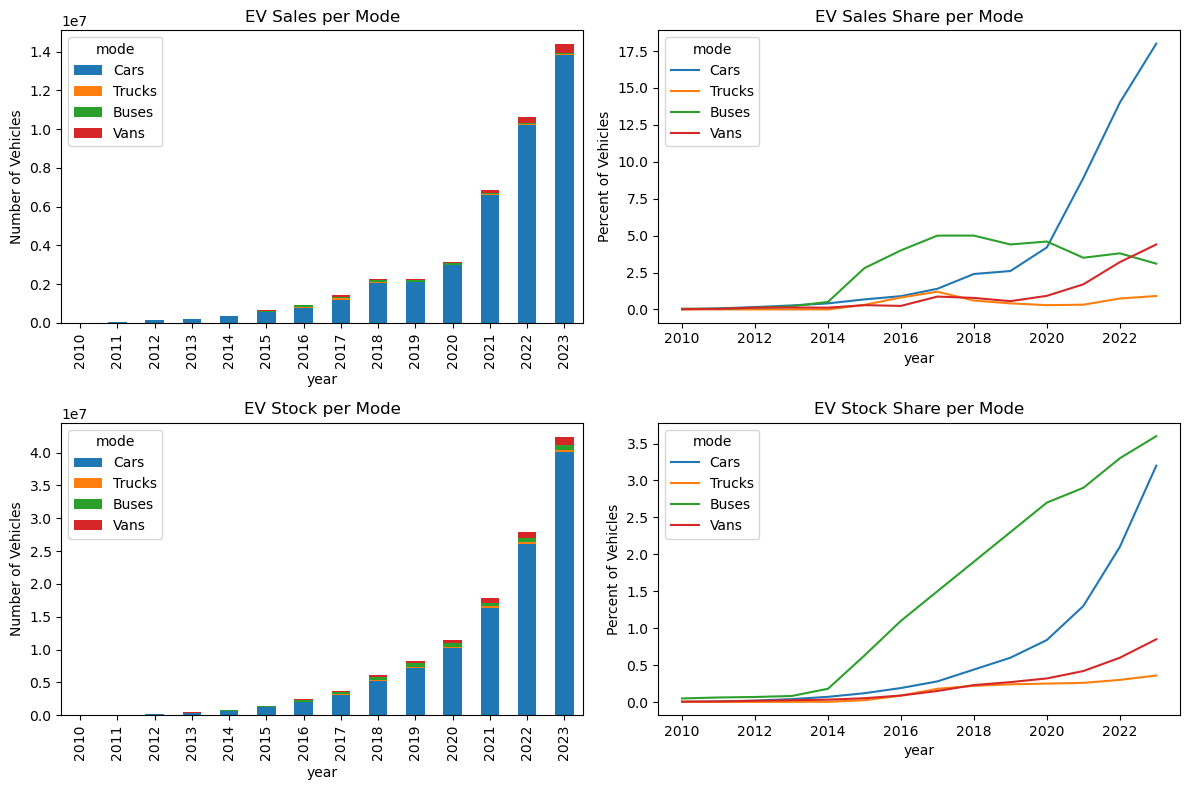

In [299]:
# Development of different modes over recent years
fig, ax= plt.subplots (2,2, figsize=(12,8))

EV_sales_h_gl_mode_pivot.plot(kind='bar',ax=ax[0,0], stacked=True)
ax[0,0].set_title('EV Sales per Mode')
ax[0,0].set_ylabel('Number of Vehicles')

sns.lineplot(data=EV_sales_share_h_gl, ax=ax[0,1], x='year', y='percent of vehicles', hue='mode')
ax[0,1].set_title('EV Sales Share per Mode')
ax[0,1].set_ylabel('Percent of Vehicles')

EV_stock_h_gl_mode_pivot.plot(kind='bar',ax=ax[1,0], stacked=True)
ax[1,0].set_title('EV Stock per Mode')
ax[1,0].set_ylabel('Number of Vehicles')

sns.lineplot(data=EV_stock_share_h_gl, ax=ax[1,1], x='year', y='percent of vehicles', hue='mode')
ax[1,1].set_title('EV Stock Share per Mode')
ax[1,1].set_ylabel('Percent of Vehicles')

plt.tight_layout()
plt.show()

In [144]:
EV_sales_sum=EV_sales_h_gl_mode_pivot[EV_sales_h_gl_mode_pivot.index==2023].sum().sum()
print(f'Share of Cars of EV sales in 2023: {(EV_sales_h_gl_mode_pivot[EV_sales_h_gl_mode_pivot.index==2023]['Cars']/EV_sales_sum*100).sum().round()}%')

Share of Cars of EV sales in 2023: 96.0%


In terms of numbers, EV sales (top left graph) will be dominated by passenger cars (96% of EV sales in 2023), with commercial vehicles such as vans, buses and trucks playing a minor role. This is to be expected as passenger cars account for the largest share of the global vehicle market. However, the share of EVs is even higher than the share of all cars (electric and non-electric) at around 70% in 2023. [6] This is reflected in the share of EV sales (graph, top right). The sales share of cars has increased the most. The sales share of buses has increased first. However, it has stagnated or slightly decreased since 2016.  The share of vans has increased slightly since 2020.  The electrification of passenger cars is more advanced than that of commercial vehicles, as the market for electric cars is larger and more diverse. The technology for electric cars is more mature and there are more government incentives and subsidies for the purchase of electric cars. In addition, the purchase cost of electric commercial vehicles is higher and the charging infrastructure for commercial vehicles is less widespread. Commercial vehicles often have specific requirements that cannot always be met by current electric powertrains, making the transition to electric commercial vehicles more difficult. [7]
The EV stock (bottom left graph) is growing in line with sales. Buses still have the highest share of the fleet (bottom right). This could be due to subsidies for public transport. Clean public transport is important in the fight against climate change. Differences in absolute numbers are due to the fact that fewer buses are needed than cars.

In [146]:
# EV stock in 2023
EV_stock_2023=EV_stock_h_gl[EV_stock_h_gl['year']==2023]
EV_stock_2023_mode_pivot = EV_stock_2023.pivot_table(index=['region', 'category', 'mode', 'year'], columns='powertrain', values='number of vehicles').reset_index()
EV_stock_2023_mode_pivot_transposed=EV_stock_2023_mode_pivot[['mode', 'BEV', 'FCEV', 'PHEV']].set_index('mode').transpose()
EV_stock_2023_mode_pivot_transposed

mode,Buses,Cars,Trucks,Vans
powertrain,,,,
BEV,650000.0,28000000.0,330000.0,1300000.0
FCEV,8700.0,66000.0,11000.0,3200.0
PHEV,39000.0,12000000.0,1300.0,15000.0


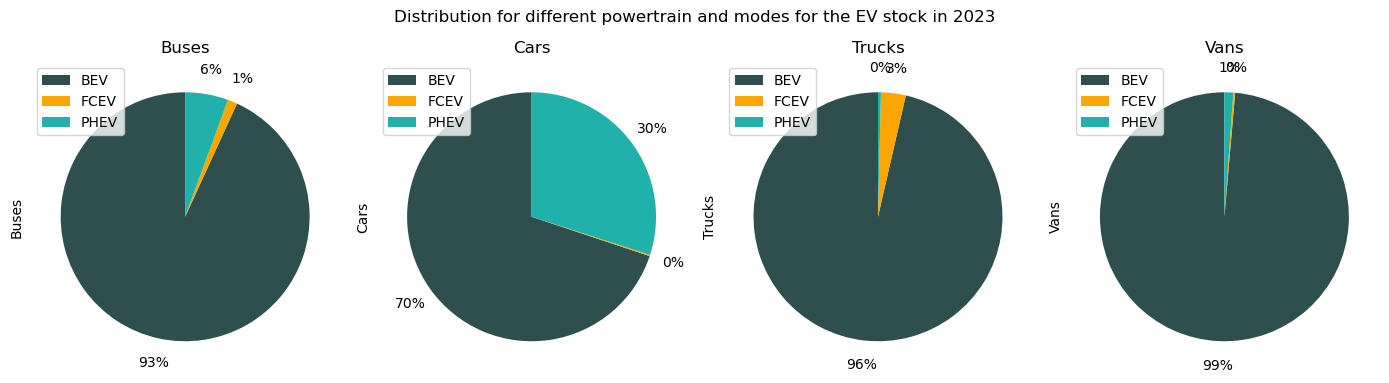

In [147]:
# Distribution for different powertrain and modes for the EV Stock in 2023
fig, ax= plt.subplots (1,4, figsize=(14,4))

EV_stock_2023_mode_pivot_transposed.plot(kind='pie', ax=ax[0], y='Buses', startangle=90, labels=None, autopct='%1.0f%%', pctdistance=1.2, legend= False, colors=['darkslategrey', 'orange','lightseagreen'])
ax[0].set_title('Buses')
ax[0].legend(['BEV', 'FCEV', 'PHEV'],loc='upper left')

EV_stock_2023_mode_pivot_transposed.plot(kind='pie', ax=ax[1], y='Cars', startangle=90, labels=None, autopct='%1.0f%%',pctdistance=1.2, legend= False, colors=['darkslategrey', 'orange','lightseagreen'])
ax[1].set_title('Cars')
ax[1].legend(['BEV', 'FCEV', 'PHEV'],loc='upper left')

EV_stock_2023_mode_pivot_transposed.plot(kind='pie', ax=ax[2], y='Trucks', startangle=90, labels=None, autopct='%1.0f%%',pctdistance=1.2, legend= False, colors=['darkslategrey', 'orange','lightseagreen'])
ax[2].set_title('Trucks')
ax[2].legend(['BEV', 'FCEV', 'PHEV'],loc='upper left')

EV_stock_2023_mode_pivot_transposed.plot(kind='pie', ax=ax[3], y='Vans', startangle=90, labels=None, autopct='%1.f%%',pctdistance=1.2, legend= False, colors=['darkslategrey', 'orange','lightseagreen'])
ax[3].set_title('Vans')
ax[3].legend(['BEV', 'FCEV', 'PHEV'],loc='upper left')

fig.suptitle ('Distribution for different powertrain and modes for the EV stock in 2023')
plt.tight_layout()
plt.show()

Plug-in Hybrid Electric Vehicles (PHEVs) play a significant role primarily in the passenger car segment. They have a minor presence in commercial vehicles such as buses, trucks, and vans. It could be, that the lower demand for commercial EVs results in a limited variety of models and powertrain options. Another possible cause are the influence of subsidies. This needs further investigation. FCEV plays no significnat role for all modes. Like discussed above, they are still at the research stage and there is a lack of refuelling infrastructure. [4, 7]

**3.3 Development of eletric car sales and stock for different regions since 2010**

In the following chapters (3.3-3.5) the focus will be on battery electric cars only. Like discussed in the introduction, the largest share of transport emissions (60% in 2022) comes from passenger cars. Furthermore, eletric cars play the most signifficant role in EV sales (96% in 2023). [1,2]
FCEVs are not taken into account, as only battery electric vehicles are to be considered here and FCEVs play a subordinate role due to the immature state of research.
How have EV car sales and stocks developed since 2010 for different regions (Europe, China, USA, Rest of the World)?

In [151]:
# Create DataFrame with Columns of each parameter (EV stock, EV sales,..) and powertrain (BEV and PHEV) for BEV & PHEV Cars
parameter_sales_stock=['EV stock share', 'EV sales share','EV sales','EV stock']
EV_cars_h_sales_stock=electromobility_df[(electromobility_df['category']=='Historical')&(electromobility_df['mode']=='Cars') & (electromobility_df['powertrain']!='FCEV') & (electromobility_df['parameter'].isin(parameter_sales_stock))]

# Pivottable for historical EV Car stock and EV Car sales
EV_cars_h = EV_cars_h_sales_stock.pivot_table(index=['region', 'category', 'mode', 'year'], columns=['parameter','powertrain'], values='value').reset_index()
EV_cars_h.columns = ["_".join(pair) for pair in EV_cars_h.columns]
EV_cars_h=EV_cars_h.drop(columns='category_')
EV_cars_h=EV_cars_h.drop(columns='mode_')
EV_cars_h=EV_cars_h.rename(columns= {'year_': 'year', 'region_':'region'})
EV_cars_h.head()

,region,year,EV sales_BEV,EV sales_PHEV,EV sales share_EV,EV stock_BEV,EV stock_PHEV,EV stock share_EV
0,Australia,2011,49.0,NaN,0.0065,49.0,NaN,0.00039
1,Australia,2012,170.0,80.0,0.0300,220.0,80.0,0.00240
2,Australia,2013,190.0,100.0,0.0340,410.0,180.0,0.00460
3,Australia,2014,370.0,950.0,0.1600,780.0,1100.0,0.01400
4,Australia,2015,760.0,1000.0,0.2000,1500.0,2100.0,0.02700


In [152]:
# a lot of missing values, focus on Sales and stock
EV_cars_h.isnull().sum()

region                 0
year                   0
EV sales_BEV           8
EV sales_PHEV        100
EV sales share_EV      9
EV stock_BEV         138
EV stock_PHEV        202
EV stock share_EV    147
dtype: int64

In [153]:
# no data for some countries in some years
EV_cars_h.groupby('year')['region'].count()

year
2010    25
2011    32
2012    33
2013    35
2014    35
2015    47
2016    48
2017    48
2018    49
2019    52
2020    52
2021    52
2022    52
2023    52
Name: region, dtype: int64

In [154]:
# check for missing values for each parameter and year
EV_cars_h_parameter=['EV sales share_EV','EV sales_BEV','EV sales_PHEV','EV sales share_EV','EV stock_BEV', 'EV stock_PHEV']
EV_cars_h.groupby('year')[EV_cars_h_parameter].apply(lambda x: x.isnull().sum())

,EV sales share_EV,EV sales_BEV,EV sales_PHEV,EV sales share_EV,EV stock_BEV,EV stock_PHEV
year,,,,,,
2010,4,4,17,4,2,16
2011,2,2,15,2,2,15
2012,1,1,7,1,3,9
2013,0,1,7,0,2,9
2014,0,0,6,0,1,7
2015,0,0,9,0,11,15
2016,0,0,8,0,12,15
2017,0,0,7,0,12,15
2018,1,0,6,1,13,16


In [155]:
# some countries have coloumns with no value at all, for example:
EV_cars_h[EV_cars_h['region']=='Latvia']

,region,year,EV sales_BEV,EV sales_PHEV,EV sales share_EV,EV stock_BEV,EV stock_PHEV,EV stock share_EV
346,Latvia,2015,17.0,9.0,0.19,NaN,NaN,NaN
347,Latvia,2016,22.0,18.0,0.24,NaN,NaN,NaN
348,Latvia,2017,22.0,18.0,0.24,NaN,NaN,NaN
349,Latvia,2018,73.0,17.0,0.53,NaN,NaN,NaN
350,Latvia,2019,86.0,12.0,0.54,NaN,NaN,NaN
351,Latvia,2020,310.0,73.0,2.60,NaN,NaN,NaN
352,Latvia,2021,410.0,140.0,3.90,NaN,NaN,NaN
353,Latvia,2022,1100.0,300.0,8.10,NaN,NaN,NaN
354,Latvia,2023,1700.0,360.0,11.00,NaN,NaN,NaN


In [156]:
# check for countries with a column without any values for all years
countries_with_column_without_values = EV_cars_h.groupby('region')[EV_cars_h_parameter].apply(lambda x: x.isnull().all())
countries_missing_values = countries_with_column_without_values[countries_with_column_without_values[EV_cars_h_parameter].any(axis=1)].index.tolist()
print(countries_missing_values)

['Bulgaria', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', 'Estonia', 'Hungary', 'Ireland', 'Latvia', 'Lithuania', 'Luxembourg', 'Romania', 'Seychelles', 'Slovakia', 'Slovenia', 'United Arab Emirates']


In [157]:
# drop countries, where one column has no values for all years; for the comparison of the countries, only countries without missing columns can be considered
EV_cars_h_filtered=EV_cars_h[~EV_cars_h['region'].isin(countries_missing_values)].copy()

In [158]:
# The missing values in the first years are assumed to be zeros. 
EV_cars_h_filtered.groupby('year')[EV_cars_h_parameter].apply(lambda x: x.isnull().sum())

,EV sales share_EV,EV sales_BEV,EV sales_PHEV,EV sales share_EV,EV stock_BEV,EV stock_PHEV
year,,,,,,
2010,4,4,17,4,2,16
2011,2,2,15,2,2,15
2012,1,1,7,1,3,9
2013,0,1,7,0,2,9
2014,0,0,6,0,1,7
2015,0,0,1,0,0,3
2016,0,0,1,0,0,2
2017,0,0,1,0,0,2
2018,0,0,1,0,0,2


In [159]:
# Replace the NaN with 0 for sales
EV_cars_h_filtered['EV sales_BEV'] = EV_cars_h_filtered['EV sales_BEV'].fillna(0)
EV_cars_h_filtered['EV sales_PHEV'] = EV_cars_h_filtered['EV sales_PHEV'].fillna(0)

# for stock use value from year before and fill 0 for the first years
EV_cars_h_filtered = EV_cars_h_filtered.sort_values(by=['region', 'year'])
EV_cars_h_filtered['EV stock_BEV'] = EV_cars_h_filtered.groupby('region')['EV stock_BEV'].ffill()
EV_cars_h_filtered['EV stock_PHEV'] = EV_cars_h_filtered.groupby('region')['EV stock_PHEV'].ffill()

EV_cars_h_filtered['EV stock_BEV'] = EV_cars_h_filtered['EV stock_BEV'].fillna(0)
EV_cars_h_filtered['EV stock_PHEV'] = EV_cars_h_filtered['EV sales_PHEV'].fillna(0)

# the NaN in the first years of sales share and stock share are assumed to be zero
EV_cars_h_filtered['EV stock share_EV'] = EV_cars_h_filtered['EV stock share_EV'].fillna(0)
EV_cars_h_filtered['EV sales share_EV'] = EV_cars_h_filtered['EV sales share_EV'].fillna(0)

EV_cars_h_filtered.head()

,region,year,EV sales_BEV,EV sales_PHEV,EV sales share_EV,EV stock_BEV,EV stock_PHEV,EV stock share_EV
0,Australia,2011,49.0,0.0,0.0065,49.0,0.0,0.00039
1,Australia,2012,170.0,80.0,0.0300,220.0,80.0,0.00240
2,Australia,2013,190.0,100.0,0.0340,410.0,100.0,0.00460
3,Australia,2014,370.0,950.0,0.1600,780.0,950.0,0.01400
4,Australia,2015,760.0,1000.0,0.2000,1500.0,1000.0,0.02700


In [160]:
# assuming that the missing values for the countries in the first years are zeros.
EV_cars_h_filtered.groupby('year')['region'].count()

year
2010    25
2011    32
2012    33
2013    35
2014    35
2015    35
2016    35
2017    35
2018    35
2019    35
2020    35
2021    35
2022    35
2023    35
Name: region, dtype: int64

In [161]:
# Add summaries
EV_cars_h_filtered.loc[:,'EV sales_Sum'] = EV_cars_h_filtered['EV sales_BEV'] + EV_cars_h_filtered['EV sales_PHEV']
EV_cars_h_filtered.loc[:,'EV stock_Sum']= EV_cars_h_filtered['EV stock_BEV']+ EV_cars_h_filtered['EV stock_PHEV']
EV_cars_h_filtered.head()

,region,year,EV sales_BEV,EV sales_PHEV,EV sales share_EV,EV stock_BEV,EV stock_PHEV,EV stock share_EV,EV sales_Sum,EV stock_Sum
0,Australia,2011,49.0,0.0,0.0065,49.0,0.0,0.00039,49.0,49.0
1,Australia,2012,170.0,80.0,0.0300,220.0,80.0,0.00240,250.0,300.0
2,Australia,2013,190.0,100.0,0.0340,410.0,100.0,0.00460,290.0,510.0
3,Australia,2014,370.0,950.0,0.1600,780.0,950.0,0.01400,1320.0,1730.0
4,Australia,2015,760.0,1000.0,0.2000,1500.0,1000.0,0.02700,1760.0,2500.0


In [162]:
# Development of EV Cars sales (share) and EV Car stock (share) for Europe, China and USA
# EV Cars in USA, Europe and China
include_regions=['USA', 'Europe', 'China'] 
EV_cars_h_USA_Europe_China=EV_cars_h_filtered[EV_cars_h_filtered.region.isin(include_regions)]

#Definition of other countries as all countries beside 'include regions', use Definition of Europe from Data Dictionary
other_regions=['Australia', 'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'India', 'Indonesia', 'Israel', 'Japan','Korea', 'Mexico','New Zealand', 'Rest of the world', 'Seychelles', 'South Africa', 'Thailand', 'Turkiye', 'United Arab Emirates']
EV_cars_h_included_regions=EV_cars_h_filtered[EV_cars_h_filtered.region.isin(other_regions)]
EV_cars_h_other_countries_sales_stock=EV_cars_h_included_regions[['region', 'year', 'EV sales_BEV', 'EV sales_PHEV', 'EV stock_BEV', 'EV stock_PHEV', 'EV sales_Sum', 'EV stock_Sum']].groupby('year').sum()
EV_cars_h_other_countries_sales_stock['region']='Other regions'
EV_cars_h_other_countries_sales_share_stock_share=EV_cars_h_included_regions[['year', 'EV sales share_EV', 'EV stock share_EV']].groupby('year').mean()
EV_cars_h_other_countries=pd.concat([EV_cars_h_other_countries_sales_stock, EV_cars_h_other_countries_sales_share_stock_share], axis=1)
EV_cars_h_other_countries=EV_cars_h_other_countries.reset_index()

# Concat both dfs:
EV_cars_h_regions=pd.concat([EV_cars_h_USA_Europe_China, EV_cars_h_other_countries])
EV_cars_h_regions=EV_cars_h_regions.reset_index(drop=True)
EV_cars_h_regions.tail()

,region,year,EV sales_BEV,EV sales_PHEV,EV sales share_EV,EV stock_BEV,EV stock_PHEV,EV stock share_EV,EV sales_Sum,EV stock_Sum
51,Other regions,2019,105710.0,54013.0,0.943308,339190.0,54013.0,0.209385,159723.0,393203.0
52,Other regions,2020,112392.0,53972.0,1.076000,473590.0,53972.0,0.282462,166364.0,527562.0
53,Other regions,2021,230190.0,111621.0,2.275231,702980.0,111621.0,0.457846,341811.0,814601.0
54,Other regions,2022,466280.0,127303.0,4.202308,1152100.0,127303.0,0.742462,593583.0,1279403.0
55,Other regions,2023,781220.0,208950.0,6.761538,1919300.0,208950.0,1.177000,990170.0,2128250.0


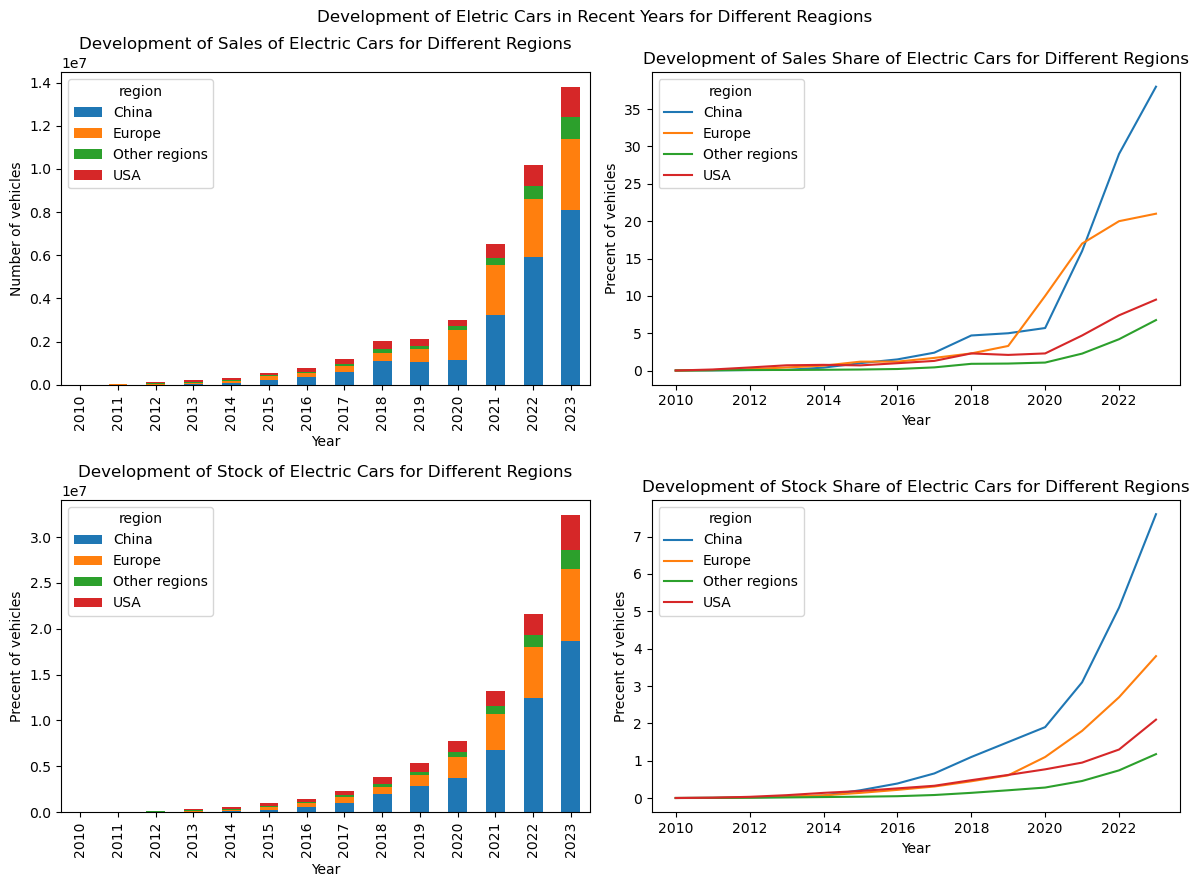

In [303]:
# Development of EV Cars sales (share) and EV Car stock (share) for Europe, China and USA
fig, ax= plt.subplots (2,2, figsize=(12,9))

EV_cars_h_regions_sales=EV_cars_h_regions[['region', 'year','EV sales_Sum']].pivot_table(index=['year'], columns='region', values='EV sales_Sum')
EV_cars_h_regions_sales.plot(kind='bar', ax=ax[0,0], stacked=True)
ax[0,0].set_title('Development of Sales of Electric Cars for Different Regions')
ax[0,0].set_xlabel('Year')
ax[0,0].set_ylabel('Number of vehicles')

EV_cars_h_regions_sales_share=EV_cars_h_regions[['region', 'year','EV sales share_EV']].pivot_table(index=['year'], columns='region', values='EV sales share_EV')
EV_cars_h_regions_sales_share.plot(kind='line', ax=ax[0,1])
ax[0,1].set_title('Development of Sales Share of Electric Cars for Different Regions')
ax[0,1].set_xlabel('Year')
ax[0,1].set_ylabel('Precent of vehicles')

EV_cars_h_regions_stock=EV_cars_h_regions[['region', 'year','EV stock_Sum']].pivot_table(index=['year'], columns='region', values='EV stock_Sum')
EV_cars_h_regions_stock.plot(kind='bar', ax=ax[1,0], stacked=True)
ax[1,0].set_title('Development of Stock of Electric Cars for Different Regions')
ax[1,0].set_xlabel('Year')
ax[1,0].set_ylabel('Precent of vehicles')

EV_cars_h_regions_stock_share=EV_cars_h_regions[['region', 'year','EV stock share_EV']].pivot_table(index=['year'], columns='region', values='EV stock share_EV')
EV_cars_h_regions_stock_share.plot(kind='line', ax=ax[1,1])
ax[1,1].set_title('Development of Stock Share of Electric Cars for Different Regions')
ax[1,1].set_xlabel('Year')
ax[1,1].set_ylabel('Precent of vehicles')

fig.suptitle ('Development of Eletric Cars in Recent Years for Different Reagions')
plt.tight_layout()
plt.show()

Over the years, China has played the most important role in electric car sales and stocks (left graphs). It is followed by Europe and the US, with other countries and regions playing a more secondary role. 
China also has the highest share of electric car sales and stocks (right graphs), followed by Europe and the US. China has established itself as the leading market for electric cars, mainly due to massive government subsidies and tax breaks that make the purchase of electric cars attractive. The government is promoting electric mobility to reduce air pollution. Low prices and extensive investment in charging infrastructure are also contributing to the high uptake of electric vehicles. Together, these factors make China the world's largest market for electric vehicles. [8]

**3.4 Distribution of sales and stock of electric cars to different countries in the last year and in recent years**

How are sales and stocks of electric cars (BEV and PHEV) distributed across individual countries in 2023 and in recent years?

In [167]:
#Focus on individual countries: exclude summary of countries
exclude_regions=['World', 'Europe', 'EU27']
EV_cars_h_filtered_countries=EV_cars_h_filtered[~EV_cars_h_filtered.region.isin(exclude_regions)]

# EV Sales & Stock: Top Countries in 2023
EV_cars_h_2023=EV_cars_h_filtered_countries[EV_cars_h_filtered_countries['year']==2023]
EV_cars_h_2023.head()

,region,year,EV sales_BEV,EV sales_PHEV,EV sales share_EV,EV stock_BEV,EV stock_PHEV,EV stock share_EV,EV sales_Sum,EV stock_Sum
12,Australia,2023,87000.0,11000.0,12.0,150000.0,11000.0,1.20,98000.0,161000.0
26,Austria,2023,48000.0,17000.0,26.0,160000.0,17000.0,4.40,65000.0,177000.0
40,Belgium,2023,93000.0,100000.0,41.0,190000.0,100000.0,8.20,193000.0,290000.0
54,Brazil,2023,19000.0,33000.0,3.0,33000.0,33000.0,0.21,52000.0,66000.0
76,Canada,2023,130000.0,41000.0,13.0,380000.0,41000.0,2.30,171000.0,421000.0


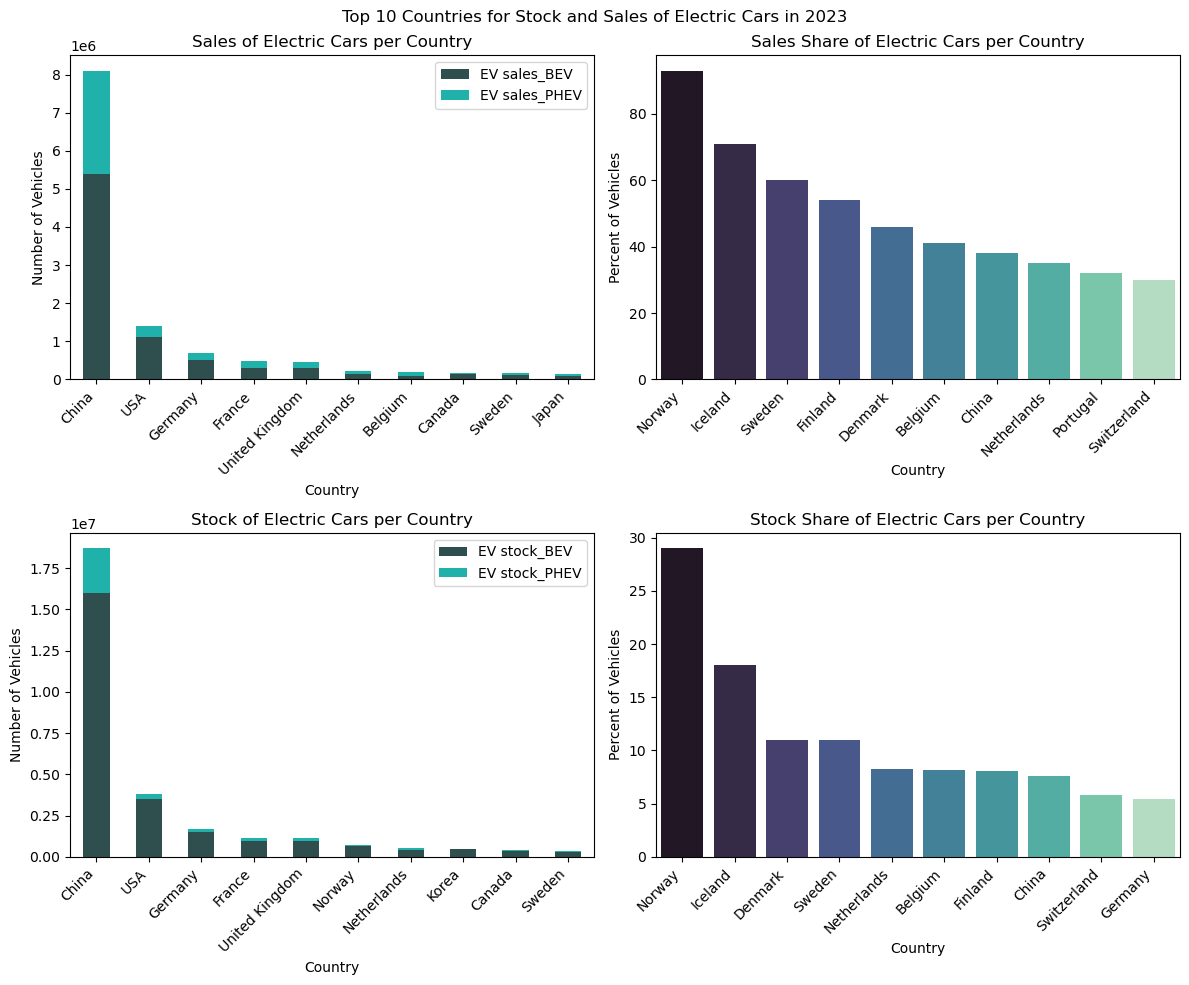

In [305]:
# Top 10 countries for electric car sales (share) and stock (share) in 2023
fig, ax= plt.subplots (2,2, figsize=(12,10))

#Top 10 countries for EV Sales in 2023
EV_cars_h_2023_sales=EV_cars_h_2023.sort_values(by='EV sales_Sum', ascending=False).head(10)
EV_cars_h_2023_sales[['region','EV sales_BEV', 'EV sales_PHEV']].plot(kind='bar',ax=ax[0,0],  x='region', stacked=True, color=['darkslategrey', 'lightseagreen'])
ax[0,0].set_title('Sales of Electric Cars per Country')
ax[0,0].set_xlabel('Country')
ax[0,0].set_ylabel('Number of Vehicles')
ax[0,0].set_xticks(ax[0,0].get_xticks(), ax[0,0].get_xticklabels(), rotation=45, ha='right')

#Top 10 countries for EV Sales Share in 2023
EV_cars_h_2023_sales_share=EV_cars_h_2023.sort_values(by='EV sales share_EV', ascending=False).head(10)
x='region'
y='EV sales share_EV'
sns.barplot(EV_cars_h_2023_sales_share.head(10),  x=x, y=y, hue=x, ax=ax[0,1], palette='mako')
ax[0,1].set_title('Sales Share of Electric Cars per Country')
ax[0,1].set_xlabel('Country')
ax[0,1].set_ylabel('Percent of Vehicles')
ax[0,1].set_xticks(ax[0,1].get_xticks(), ax[0,1].get_xticklabels(), rotation=45, ha='right')

#Top 10 countries for EV Stock in 2023
EV_cars_h_2023_stock=EV_cars_h_2023.sort_values(by='EV stock_Sum', ascending=False).head(10)
EV_cars_h_2023_stock[['region','EV stock_BEV', 'EV stock_PHEV']].head(10).plot(kind='bar',ax=ax[1,0],  x='region', stacked=True, color=['darkslategrey', 'lightseagreen'])
ax[1,0].set_title('Stock of Electric Cars per Country')
ax[1,0].set_xlabel('Country')
ax[1,0].set_ylabel('Number of Vehicles')
ax[1,0].set_xticks(ax[1,0].get_xticks(), ax[1,0].get_xticklabels(), rotation=45, ha='right')

#Top 10 countries for EV Stock Share in 2023
EV_cars_h_2023_stock_share=EV_cars_h_2023.sort_values(by='EV stock share_EV', ascending=False).head(10)
x='region'
y='EV stock share_EV'
sns.barplot(EV_cars_h_2023_stock_share.head(10),  x=x, y=y, hue=x, ax=ax[1,1], palette='mako')
ax[1,1].set_title('Stock Share of Electric Cars per Country')
ax[1,1].set_xlabel('Country')
ax[1,1].set_ylabel('Percent of Vehicles')
ax[1,1].set_xticks(ax[1,1].get_xticks(), ax[1,1].get_xticklabels(), rotation=45, ha='right')

fig.suptitle ('Top 10 Countries for Stock and Sales of Electric Cars in 2023')
plt.tight_layout()
plt.show()

In [169]:
print(f'In 2023, Norway has a electric car sales share of {EV_cars_h_2023[EV_cars_h_2023['region']=='Norway']['EV sales share_EV'].sum()}% and a stock share of {EV_cars_h_2023[EV_cars_h_2023['region']=='Norway']['EV stock share_EV'].sum()}%')

In 2023, Norway has a electric car sales share of 93.0% and a stock share of 29.0%


In 2023, China remains the largest market for electric car sales (graph top left), which aligns with its status as the most populous country in the world and as discussed above, the government's support for electromobility. Following China, the United States and Germany also show significant electric car sales. The electric car stock (graph bottom left) in 2023 mirrors the sales distribution, with a similar ratio of Plug-in Hybrid Electric Vehicles (PHEVs) to Battery Electric Vehicles (BEVs) across all countries. However, compared to EV Sales there is a lower share of PHEVs. PHEVs seem to get more attractive. This could be due to subsidues. This needs to be investigated further.

The Scandinavian countries, particularly Norway, exhibit exceptionally high sales and stock shares of electric cars (graphs on the right). Norway leads with a 93% sales share and a 29% stock share. The high sales of electric cars in Norway are due to generous government incentives, ambitious climate targets, a well-developed charging infrastructure, high public acceptance and strong environmental awareness. These factors have made Norway the world leader in electric car sales.[9]

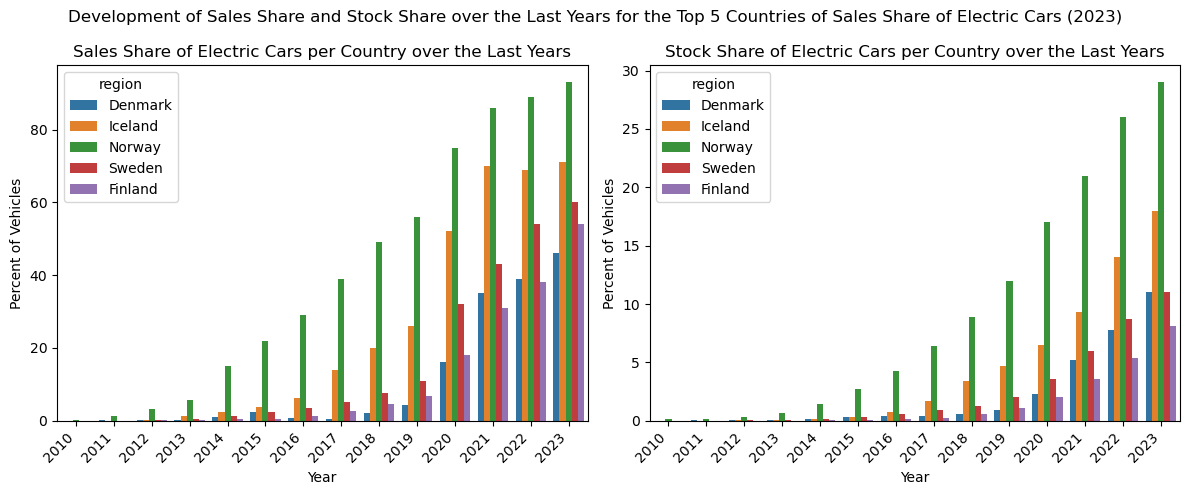

In [309]:
# Development of Sales Share and Stock Share over the last years for the top 5 countries of EV sales share (2023)
fig, ax= plt.subplots(1,2, figsize=(12,5))
top_5_countries=EV_cars_h_2023_sales_share['region'].head().to_list()

sns.barplot(data=EV_cars_h_filtered[EV_cars_h_filtered['region'].isin(top_5_countries)], x='year', y='EV sales share_EV', hue='region', ax=ax[0])#, palette='mako')
ax[0].set_title('Sales Share of Electric Cars per Country over the Last Years')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Percent of Vehicles')
ax[0].set_xticks(ax[0].get_xticks(), ax[0].get_xticklabels(), rotation=45, ha='right')

sns.barplot(data=EV_cars_h_filtered[EV_cars_h_filtered['region'].isin(top_5_countries)], x='year', y='EV stock share_EV', hue='region', ax=ax[1])#, palette='mako')
ax[1].set_title('Stock Share of Electric Cars per Country over the Last Years')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Percent of Vehicles')
ax[1].set_xticks(ax[1].get_xticks(), ax[1].get_xticklabels(), rotation=45, ha='right')

fig.suptitle ('Development of Sales Share and Stock Share over the Last Years for the Top 5 Countries of Sales Share of Electric Cars (2023)')
plt.tight_layout()
plt.show()

The top 5 countries of EV sales Share (2023) show a similar development over the years. Norway is leading the sales share and the stock share for all years. Like discussed above, it needs to be further investigated, why these countries are leading in EV Sales and how this could be used to increase the EV Sales in other countries. What is the impact of policies and public awareness?

In [173]:
# describtive statistics of the EV stock
EV_cars_h_2023[['EV stock share_EV', 'EV sales share_EV']].describe()

,EV stock share_EV,EV sales share_EV
count,32.000000,32.000000
mean,4.731281,23.068750
std,6.058955,22.461859
min,0.044000,0.290000
25%,0.787500,7.575000
50%,2.600000,14.000000
75%,6.250000,32.750000
max,29.000000,93.000000


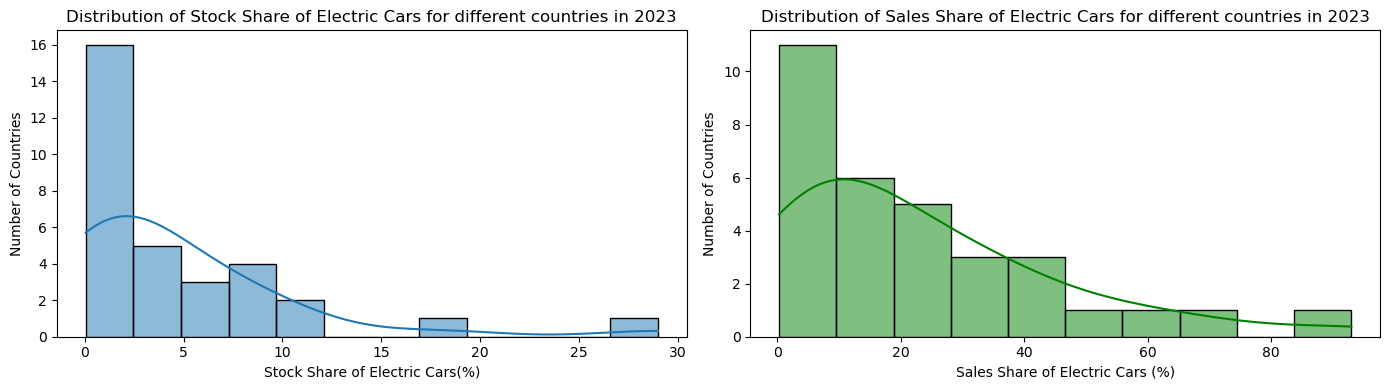

In [313]:
# Distribution of EV stock share and sales share for different countries in 2023
fig, ax= plt.subplots (1,2, figsize=(14,4))

sns.histplot(EV_cars_h_2023['EV stock share_EV'], ax=ax[0], bins=12, kde=True)
ax[0].set_title('Distribution of Stock Share of Electric Cars for different countries in 2023')
ax[0].set_ylabel('Number of Countries')
ax[0].set_xlabel('Stock Share of Electric Cars(%)')

sns.histplot(EV_cars_h_2023['EV sales share_EV'], ax=ax[1], bins=10, kde=True, color='green')
ax[1].set_title('Distribution of Sales Share of Electric Cars for different countries in 2023')
ax[1].set_ylabel('Number of Countries')
ax[1].set_xlabel('Sales Share of Electric Cars (%)')

plt.tight_layout()
plt.show()

The distribution of the EV cars stock is skewed to the right, as most countries have a low share of electric vehicles, with only a few countries having a high share. The most common share of electric cars (mode) falls within the 0 to 5% range. Notably, Norway and Iceland are exceptions with significantly higher stock shares.
Similarly, the distribution of EV car sales shares is also skewed to the right, with the most common share of electric vehicle sales (mode) ranging from 0 to 10%. Norway stands out as an upward outlier in this category as well.
The positive factors influencing the electric vehicle market in Norway warrant further investigation to understand their impact better.

**3.5 Correlation between Charging points, Stock and Sales of Electric Cars**

What is the relationship between the number of public charging points, electric car sales and stocks?

In [178]:
# Create DataFrame with Columns of each parameter (EV stock, EV sales,..) and powertrain (BEV and PHEV) for BEV & PHEV Cars
EV_h_charging_points=electromobility_df[(electromobility_df['category']=='Historical')&(electromobility_df['parameter']=='EV charging points')]

# Create pivottable for historical Charging Points
EV_h_charging_points_pivot=EV_h_charging_points.pivot_table(index=['region', 'category', 'mode', 'year'], columns=['parameter','powertrain'], values='value').reset_index()
EV_h_charging_points_pivot.columns = ["_".join(pair) for pair in EV_h_charging_points_pivot.columns]
EV_h_charging_points_pivot=EV_h_charging_points_pivot.drop(columns='category_')
EV_h_charging_points_pivot=EV_h_charging_points_pivot.drop(columns='mode_')
EV_h_charging_points_pivot=EV_h_charging_points_pivot.rename(columns= {'year_': 'year', 'region_':'region'})
EV_h_charging_points_pivot.head()

,region,year,EV charging points_Publicly available fast,EV charging points_Publicly available slow
0,Australia,2017,40.0,440.0
1,Australia,2018,61.0,670.0
2,Australia,2019,NaN,1700.0
3,Australia,2020,NaN,2300.0
4,Australia,2021,320.0,2000.0


In [179]:
# no countries with a column without any values for all years
parameter_charging=['EV charging points_Publicly available fast','EV charging points_Publicly available slow']
countries_with_charging_column_without_values = EV_h_charging_points_pivot.groupby('region')[parameter_charging].apply(lambda x: x.isnull().all())
countries_missing_charging_values = countries_with_charging_column_without_values[countries_with_charging_column_without_values[parameter_charging].any(axis=1)].index.tolist()
print(countries_missing_charging_values)

[]


In [180]:
# The missing values are distributed over the years
EV_h_charging_points_pivot.groupby('year')[parameter_charging].apply(lambda x: x.isnull().sum())

,EV charging points_Publicly available fast,EV charging points_Publicly available slow
year,,
2010,5,1
2011,3,1
2012,2,1
2013,3,2
2014,2,2
2015,2,1
2016,1,1
2017,0,1
2018,0,0


In [181]:
# Fill NaN with values from the year before: assuming that there were no changes in the number of charging points
EV_h_charging_points_pivot = EV_h_charging_points_pivot.sort_values(by=['region', 'year'])
EV_h_charging_points_pivot['EV charging points_Publicly available fast'] = EV_h_charging_points_pivot.groupby('region')['EV charging points_Publicly available fast'].ffill()
EV_h_charging_points_pivot['EV charging points_Publicly available slow'] = EV_h_charging_points_pivot.groupby('region')['EV charging points_Publicly available slow'].ffill()
EV_h_charging_points_pivot.head()

,region,year,EV charging points_Publicly available fast,EV charging points_Publicly available slow
0,Australia,2017,40.0,440.0
1,Australia,2018,61.0,670.0
2,Australia,2019,61.0,1700.0
3,Australia,2020,61.0,2300.0
4,Australia,2021,320.0,2000.0


In [182]:
# fill the rest of NaN in the first years with zeros
EV_h_charging_points_pivot.loc[:, 'EV charging points_Publicly available fast'] = EV_h_charging_points_pivot['EV charging points_Publicly available fast'].fillna(0)
EV_h_charging_points_pivot.loc[:, 'EV charging points_Publicly available slow'] = EV_h_charging_points_pivot['EV charging points_Publicly available slow'].fillna(0)

In [183]:
#Adding the summary of charging points
EV_h_charging_points_pivot['EV charging points_sum']=EV_h_charging_points_pivot[parameter_charging].sum(axis=1)
EV_h_charging_points_pivot

# merge charging points and EV_cars_h_filtered; for the correlation only countries without missing columns can be considered
EV_cars_charge_h=pd.merge(EV_cars_h_filtered, EV_h_charging_points_pivot, how='inner', left_on=['year', 'region'], right_on = ['year', 'region'])
EV_cars_charge_h.head()

,region,year,EV sales_BEV,EV sales_PHEV,EV sales share_EV,EV stock_BEV,EV stock_PHEV,EV stock share_EV,EV sales_Sum,EV stock_Sum,EV charging points_Publicly available fast,EV charging points_Publicly available slow,EV charging points_sum
0,Australia,2017,1200.0,1100.0,0.26,3400.0,1100.0,0.052,2300.0,4500.0,40.0,440.0,480.0
1,Australia,2018,1800.0,1800.0,0.42,5200.0,1800.0,0.077,3600.0,7000.0,61.0,670.0,731.0
2,Australia,2019,6300.0,2900.0,1.20,12000.0,2900.0,0.140,9200.0,14900.0,61.0,1700.0,1761.0
3,Australia,2020,5200.0,1700.0,1.10,17000.0,1700.0,0.180,6900.0,18700.0,61.0,2300.0,2361.0
4,Australia,2021,17000.0,3400.0,2.80,34000.0,3400.0,0.320,20400.0,37400.0,320.0,2000.0,2320.0


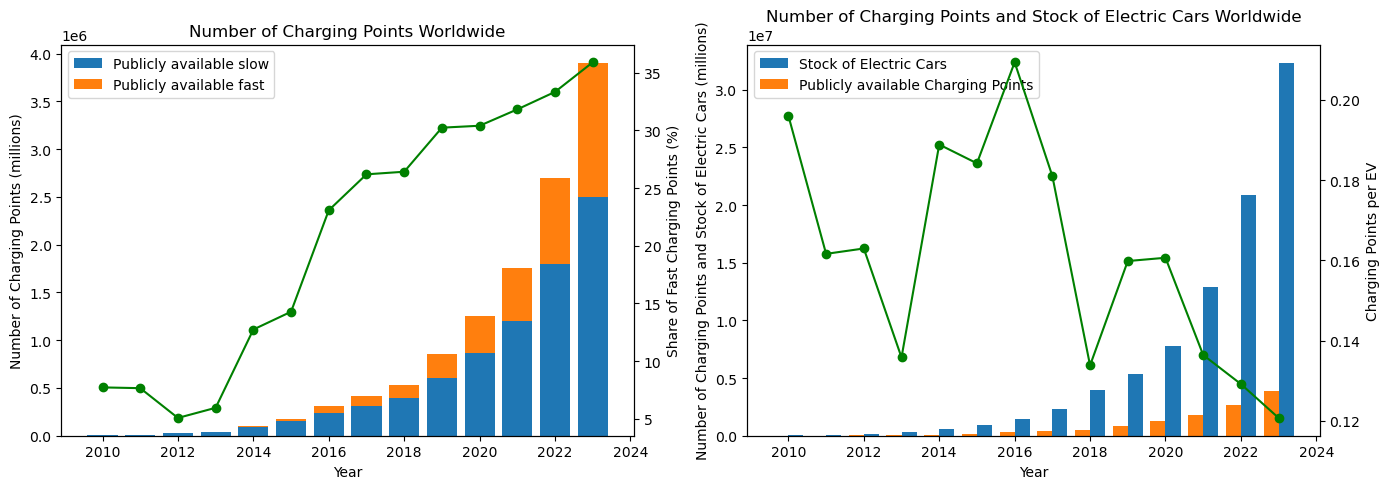

In [320]:
# Development of number of charging points worldwide
EV_cars_charge_h['share of fast charging points']=EV_cars_charge_h['EV charging points_Publicly available fast']/(EV_cars_charge_h['EV charging points_Publicly available fast'] + EV_cars_charge_h['EV charging points_Publicly available slow'])*100
EV_cars_charge_h['Charging Points per EV']=np.where(EV_cars_charge_h['EV stock_Sum']!=0,EV_cars_charge_h['EV charging points_sum']/EV_cars_charge_h['EV stock_Sum'], np.nan)
EV_cars_charge_h_gl=EV_cars_charge_h[EV_cars_charge_h['region']=='World']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
width = 0.4

# Development of slow and fast charging
ax1.bar(EV_cars_charge_h_gl['year'], EV_cars_charge_h_gl['EV charging points_Publicly available slow'], label='Publicly available slow')
ax1.bar(EV_cars_charge_h_gl['year'], EV_cars_charge_h_gl['EV charging points_Publicly available fast'], label='Publicly available fast', bottom=EV_cars_charge_h_gl['EV charging points_Publicly available slow'])
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Charging Points (millions)')
ax1.set_title('Number of Charging Points Worldwide')
ax1.legend(loc='upper left')

ax3 = ax1.twinx()
ax3.plot(EV_cars_charge_h_gl['year'], EV_cars_charge_h_gl['share of fast charging points'], label='Share of Fast Charging Points', color='green', marker='o')
ax3.set_ylabel('Share of Fast Charging Points (%)')

# Development electric car stock and charging points
ax2.bar(EV_cars_charge_h_gl['year'] + width/2, EV_cars_charge_h_gl['EV stock_Sum'], width=width, label='Stock of Electric Cars')
ax2.bar(EV_cars_charge_h_gl['year'] - width/2, EV_cars_charge_h_gl['EV charging points_sum'], width=width, label='Publicly available Charging Points')
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of Charging Points and Stock of Electric Cars (millions)')
ax2.set_title('Number of Charging Points and Stock of Electric Cars Worldwide')
ax2.legend(loc='upper left')

ax4 = ax2.twinx()
ax4.plot(EV_cars_charge_h_gl['year'], EV_cars_charge_h_gl['Charging Points per EV'], label='Charging Points per EV', color='green', marker='o')
ax4.set_ylabel('Charging Points per EV')

plt.tight_layout()
plt.show()

The number of publicly available charging points worldwide is steadily increasing, driven by the rising demand that accompanies the growing stock of electric vehicles (EVs). Additionally, the proportion of fast charging points is also on the rise, likely due to advancements in battery technology and the charging process over the years. This positive trend could make electric cars more attractive due to shorter charging times.

Over time, the number of charging points per electric car has decreased. Initially, extensive area coverage with charging stations is required, leading to a high number of charging stations per EV. However, as the number of EVs increases, this ratio was adjusted 2014-2016 and 2019-2020. Since then the ratio decreased again. The key questions remain: how many private charging stations exist, and are customers satisfied with the overall coverage of charging stations?

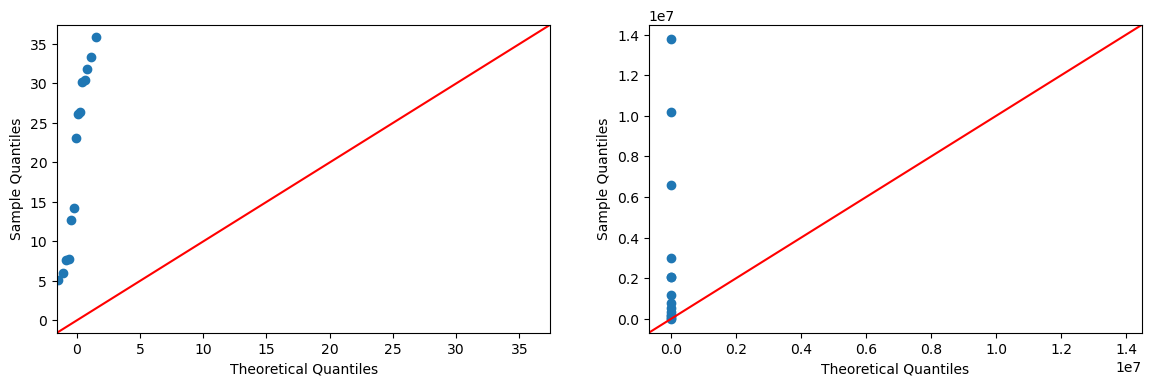

In [186]:
# not normal distribution, but monotonous -> use spearmen method for correlation
fig, ax= plt.subplots (1,2, figsize=(14,4))
sm.qqplot(EV_cars_charge_h_gl['share of fast charging points'], line ='45', ax=ax[0])
sm.qqplot(EV_cars_charge_h_gl['EV sales_Sum'], line ='45', ax=ax[1])
plt.show()

In [187]:
print(f' There ist a strong positive correlation between EV Sales and Share of fast charging points (corr = {EV_cars_charge_h_gl['EV sales_Sum'].corr(EV_cars_charge_h_gl['share of fast charging points'], method='spearman').round(2)}).')

 There ist a strong positive correlation between EV Sales and Share of fast charging points (corr = 0.96).


In [188]:
print(f' There ist a moderate negative correlation between EV Sales and Charging Points per EV (corr = {EV_cars_charge_h_gl['EV sales_Sum'].corr(EV_cars_charge_h_gl['Charging Points per EV'], method='spearman').round(2)}).')

 There ist a moderate negative correlation between EV Sales and Charging Points per EV (corr = -0.65).


In [189]:
# EV Cars in USA, Europe and China
EV_h_charging_points_USA_Europe_China =EV_h_charging_points_pivot[EV_h_charging_points_pivot.region.isin(include_regions)]

#Definition of other countries as all countries beside 'include regions', use Definition of Europe from Data Dictionary
EV_h_charging_points_included_regions=EV_h_charging_points_pivot[EV_h_charging_points_pivot.region.isin(other_regions)]
EV_h_charging_points_included_regions=EV_h_charging_points_included_regions[['region', 'year', 'EV charging points_Publicly available fast', 'EV charging points_Publicly available slow', 'EV charging points_sum']].groupby('year').sum()
EV_h_charging_points_included_regions['region']='Other regions'
EV_h_charging_points_other_regions=EV_h_charging_points_included_regions.reset_index()
EV_h_charging_points_other_regions

# Concat both dfs:
EV_charging_h_regions=pd.concat([EV_h_charging_points_USA_Europe_China, EV_h_charging_points_other_regions])
EV_charging_h_regions=EV_charging_h_regions.reset_index(drop=True)
EV_charging_h_regions.tail()

,region,year,EV charging points_Publicly available fast,EV charging points_Publicly available slow,EV charging points_sum
47,Other regions,2019,16978.0,72620.1,89598.1
48,Other regions,2020,21617.0,77110.1,98727.1
49,Other regions,2021,28323.0,133834.1,162157.1
50,Other regions,2022,40160.9,239060.0,279220.9
51,Other regions,2023,44000.9,253140.0,297140.9


In [190]:
# merge charging points and EV_cars_h_filtered 
EV_cars_charge_h_regions=pd.merge(EV_cars_h_regions, EV_charging_h_regions, how='inner', left_on=['year', 'region'], right_on = ['year', 'region'])
EV_cars_charge_h_regions

EV_cars_charge_h_regions['share of fast charging points']=EV_cars_charge_h_regions['EV charging points_Publicly available fast']/(EV_cars_charge_h_regions['EV charging points_Publicly available fast'] + EV_cars_charge_h_regions['EV charging points_Publicly available slow'])*100
EV_cars_charge_h_regions['Charging Points per EV']=np.where(EV_cars_charge_h_regions['EV stock_Sum']!=0,EV_cars_charge_h_regions['EV charging points_sum']/EV_cars_charge_h_regions['EV stock_Sum'], np.nan)
EV_cars_charge_h_regions.tail()

,region,year,EV sales_BEV,EV sales_PHEV,EV sales share_EV,EV stock_BEV,EV stock_PHEV,EV stock share_EV,EV sales_Sum,EV stock_Sum,EV charging points_Publicly available fast,EV charging points_Publicly available slow,EV charging points_sum,share of fast charging points,Charging Points per EV
47,Other regions,2019,105710.0,54013.0,0.943308,339190.0,54013.0,0.209385,159723.0,393203.0,16978.0,72620.1,89598.1,18.949063,0.227867
48,Other regions,2020,112392.0,53972.0,1.076000,473590.0,53972.0,0.282462,166364.0,527562.0,21617.0,77110.1,98727.1,21.895710,0.187138
49,Other regions,2021,230190.0,111621.0,2.275231,702980.0,111621.0,0.457846,341811.0,814601.0,28323.0,133834.1,162157.1,17.466395,0.199063
50,Other regions,2022,466280.0,127303.0,4.202308,1152100.0,127303.0,0.742462,593583.0,1279403.0,40160.9,239060.0,279220.9,14.383200,0.218243
51,Other regions,2023,781220.0,208950.0,6.761538,1919300.0,208950.0,1.177000,990170.0,2128250.0,44000.9,253140.0,297140.9,14.808093,0.139617


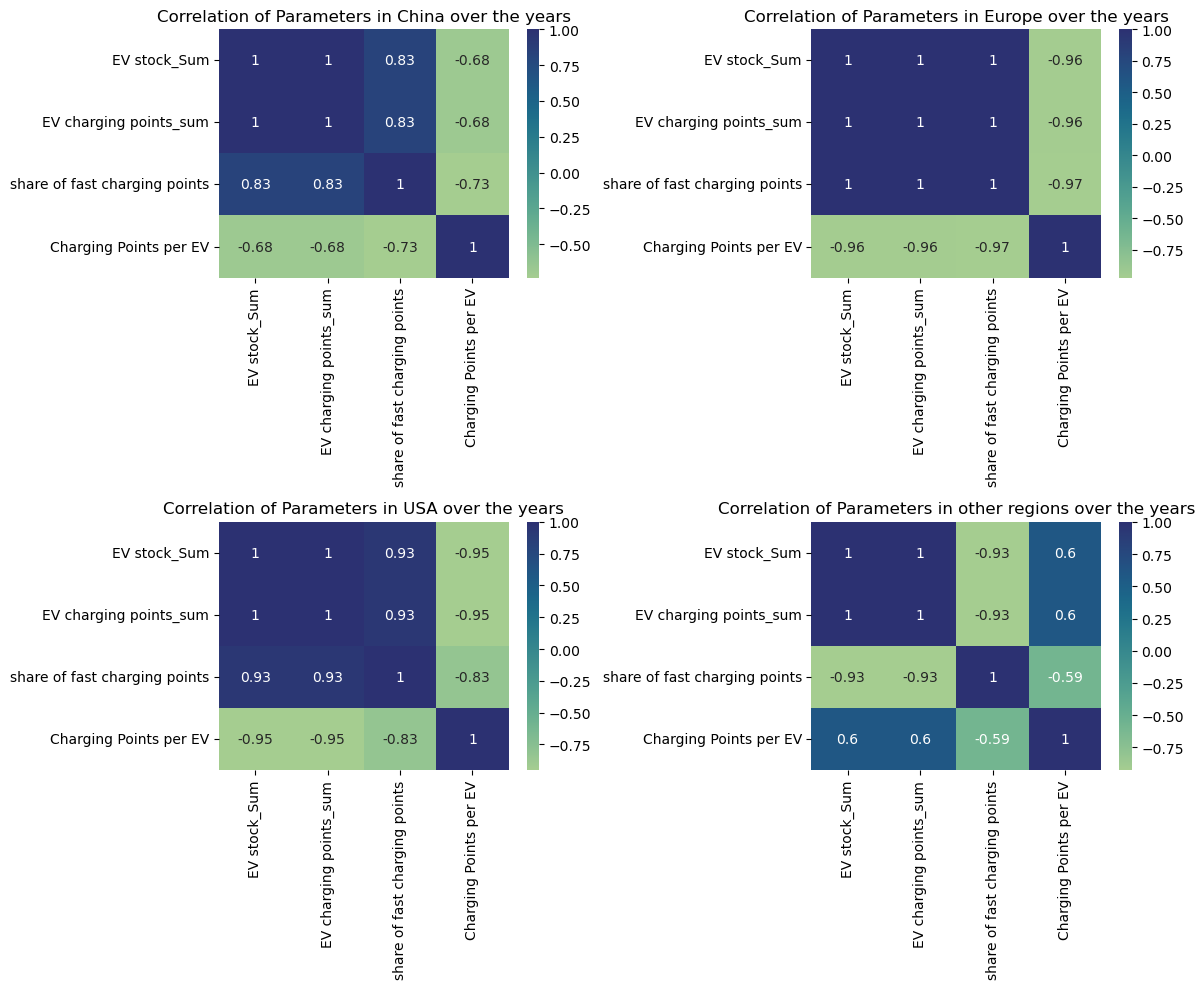

In [191]:
# Correlation of the parameters over the years for different regions
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
EV_cars_charge_China=EV_cars_charge_h_regions[EV_cars_charge_h_regions['region']=='China']
EV_cars_charge_Europe=EV_cars_charge_h_regions[EV_cars_charge_h_regions['region']=='Europe']
EV_cars_charge_USA=EV_cars_charge_h_regions[EV_cars_charge_h_regions['region']=='USA']
EV_cars_charge_other_regions=EV_cars_charge_h_regions[EV_cars_charge_h_regions['region']=='Other regions']

EV_cars_charge_China_corr=EV_cars_charge_China[['EV stock_Sum', 'EV charging points_sum', 'share of fast charging points', 'Charging Points per EV']].corr(method = 'spearman')
sns.heatmap(EV_cars_charge_China_corr, annot=True, cmap="crest", ax=ax[0,0])
ax[0,0].set_title('Correlation of Parameters in China over the years')

EV_cars_charge_Europe_corr=EV_cars_charge_Europe[['EV stock_Sum', 'EV charging points_sum', 'share of fast charging points', 'Charging Points per EV']].corr(method = 'spearman')
sns.heatmap(EV_cars_charge_Europe_corr, annot=True, cmap="crest", ax=ax[0,1])
ax[0,1].set_title('Correlation of Parameters in Europe over the years')

EV_cars_charge_USA_corr=EV_cars_charge_USA[['EV stock_Sum','EV charging points_sum', 'share of fast charging points', 'Charging Points per EV']].corr(method = 'spearman')
sns.heatmap(EV_cars_charge_USA_corr, annot=True, cmap="crest", ax=ax[1,0])
ax[1,0].set_title('Correlation of Parameters in USA over the years')

EV_cars_charge_other_regions_corr=EV_cars_charge_other_regions[['EV stock_Sum', 'EV charging points_sum', 'share of fast charging points', 'Charging Points per EV']].corr(method = 'spearman')
sns.heatmap(EV_cars_charge_other_regions_corr, annot=True, cmap="crest", ax=ax[1,1])
ax[1,1].set_title('Correlation of Parameters in other regions over the years')

plt.tight_layout()
plt.show()

As expected, there is a strong positive correlation between EV stock and number of charging points for all regions. 
China, Europe and the US show a similar strong positive correlation for the share of fast charging points and EV stock. China, Europe and the US show a negative correlation for charging points per car and car stock. For Europe and the US, there is even a strong negative correlation. As the number of EVs increases, the relationship does not adjust. The number of charging points per EV correlates moderately negatively with the share of fast charging stations. This could be because a faster charging process requires fewer charging points and fast charging points are more expensive to build [11].
The heatmap is different for the rest of the world. Here there is a moderate positive correlation between charging points per EV and EV stock. As discussed above, a large area coverage with charging points is needed initially and the EV stock of the rest of the world is much smaller compared to the US, China and Europe. There is a strong negative correlation between the share of fast charging points and EV stock. It could be that more slow charging stations are built because they are less expensive and it is easier to build a charging infrastructure network in the beginning. [11]

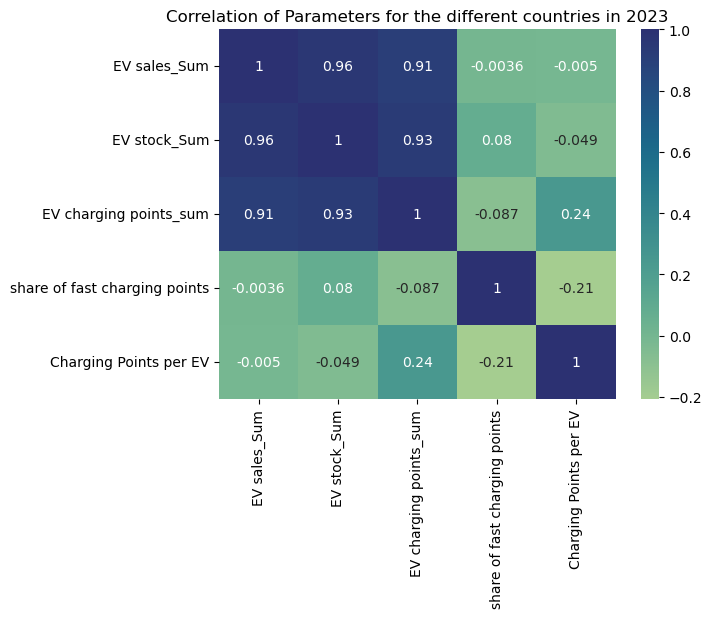

In [193]:
# development of Charging Points in different countries
exclude_regions=['World', 'Europe', 'EU27']
EV_cars_charge_h_countries=EV_cars_charge_h[~EV_cars_charge_h.region.isin(exclude_regions)]

# Charging points correlation for different regions in 2023
EV_cars_charge_h_countries_2023 = EV_cars_charge_h_countries[EV_cars_charge_h_countries['year']==2023]
EV_cars_charge_h_countries_2023_corr=EV_cars_charge_h_countries_2023[['EV sales_Sum','EV stock_Sum', 'EV charging points_sum', 'share of fast charging points', 'Charging Points per EV']].corr(method = 'spearman')
sns.heatmap(EV_cars_charge_h_countries_2023_corr, annot=True, cmap="crest")
plt.title('Correlation of Parameters for the different countries in 2023')
plt.show()

Comparing different countries in 2023, there is a strong positive correlation between EV stock, sales and number of charging points.
There is a weak negative correlation between charging points per EV and electric car stock and sales (share). As discussed above, a large area coverage with charging points is needed initially. As the number of EVs increases, the ratio does not adjust.
There is no significant correlation between the share of fast charging points and electric car sales and stock (share). Contrary to expectations, a country with a higher share of fast charging stations does not have necessarly have higher electric car sales. This could be because people prefer to charge their cars at home. [10] 
The number of charging points per EV correlates moderately negatively with the share of fast charging stations. This could be because a faster charging process requires fewer charging points and fast charging points are more expensive to build [11]

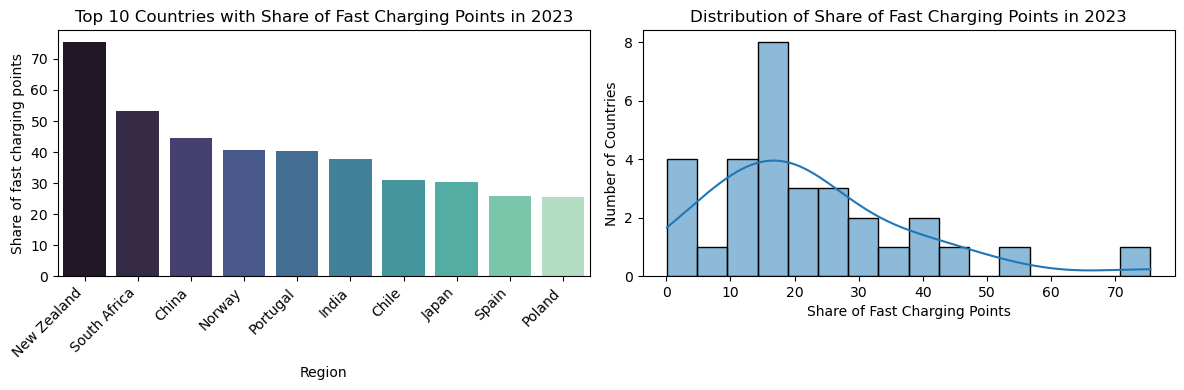

In [332]:
EV_cars_charge_h_2023=EV_cars_charge_h_countries[EV_cars_charge_h_countries['year']==2023]

fig, ax= plt.subplots (1,2, figsize=(12,4))
x='region'
y1='share of fast charging points'

EV_cars_charge_h_2023_sorted_fc=EV_cars_charge_h_2023.sort_values(by='share of fast charging points', ascending=False)
sns.barplot(EV_cars_charge_h_2023_sorted_fc.head(10), x=x, y=y1, hue=x, palette='mako', ax=ax[0])
ax[0].set_title('Top 10 Countries with Share of Fast Charging Points in 2023')
ax[0].set_xlabel('Region')
ax[0].set_ylabel('Share of fast charging points')
ax[0].set_xticks(ax[0].get_xticks(), ax[0].get_xticklabels(), rotation=45, ha='right')

sns.histplot(EV_cars_charge_h_2023['share of fast charging points'] ,ax=ax[1], bins=16, kde=True)
ax[1].set_title('Distribution of Share of Fast Charging Points in 2023')
ax[1].set_ylabel('Number of Countries')
ax[1].set_xlabel('Share of Fast Charging Points')

plt.tight_layout()
plt.show()

The distribution of the share of fast charging points is skewed to the right, as most countries have a low share of fast charging points and only a few countries have a high share. The most common share of electric cars (mode) is in the 15-20% range. Notably, New Zealand is an exception with a significantly higher share of fast charging points (75%). However, New Zealand has a low share of EV stock (2.8%). As discussed above, there is no significant correlation between EV stock/sales and the share of publicly available fast charging points.

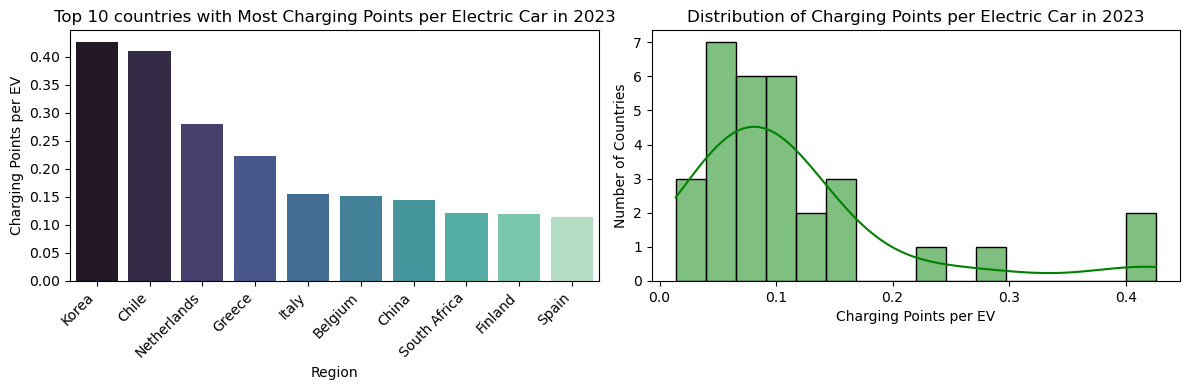

In [334]:
fig, ax= plt.subplots (1,2, figsize=(12,4))
x='region'
y2='Charging Points per EV'

EV_cars_charge_h_2023_sorted_per_EV=EV_cars_charge_h_2023.sort_values(by='Charging Points per EV', ascending=False)
sns.barplot(EV_cars_charge_h_2023_sorted_per_EV.head(10),  x=x, y=y2, hue=x, ax=ax[0], palette='mako')
ax[0].set_title('Top 10 countries with Most Charging Points per Electric Car in 2023')
ax[0].set_ylabel('Charging Points per EV')
ax[0].set_xlabel('Region')
ax[0].set_xticks(ax[0].get_xticks(), ax[0].get_xticklabels(), rotation=45, ha='right')

sns.histplot(EV_cars_charge_h_2023['Charging Points per EV'],ax=ax[1], color='green', bins=16, kde=True)
ax[1].set_title('Distribution of Charging Points per Electric Car in 2023')
ax[1].set_ylabel('Number of Countries')
ax[1].set_xlabel('Charging Points per EV')

plt.tight_layout()
plt.show()

The distribution of the Charging Points per EV is skewed to the right, as most countries have a low ratio of Charging pints per EV, with only a few countries having a high share. The most common share of electric cars (mode) falls around 0.9. Notably, Korea and Chile are exceptions with a significantly higher ratio (> 0.4).
However, Korea and Chile have a low EV stock share (2.4 and 0.1%). Like discussed above there is a weak negative correlation between charging points per EV and EV stock/sales (share).

## 4. Conclusion and Outlook

**4.1 Conclusion**

The results are displayed as a Power BI Dashboard ('electromobility_dashboard.pbix') and are included in this Chapter as pictures of the Dashboard.

In [202]:
# Exporting Data for Excel Assignment and Power Bi Dashboard
#with pd.ExcelWriter("Electromoblity.xlsx") as writer:
#    EV_sales_h_gl.to_excel(writer, sheet_name="EV_sales_global", index=False)
#    EV_sales_share_h_gl.to_excel(writer, sheet_name="EV_sales_share_global", index=False)
#    EV_stock_h_gl.to_excel(writer, sheet_name="EV_stock_global", index=False)
#    EV_stock_share_h_gl.to_excel(writer, sheet_name="EV_stock_share_global", index=False)
#    EV_cars_h_filtered_countries.to_excel(writer, sheet_name="Cars_countries", index=False)
#    EV_cars_h_regions.to_excel(writer, sheet_name="Cars_regions", index=False)
#    EV_cars_charge_h_gl.to_excel(writer, sheet_name="Charge_global", index=False)
#    EV_cars_charge_h_countries.to_excel(writer, sheet_name="Charge_countries", index=False)
#    EV_cars_charge_h_countries_2023_corr.to_excel(writer, sheet_name="Charge_countries_2023_corr", index=True)

![Picture of Power BI: Development_of_Electromobility_Worldwide](Development_of_Electromobility_Worldwide.png "Development of Electromobility Worldwide")

In 2023, approximately 14.4 million electric vehicles (EVs) were sold, resulting in an EV stock of approximately 42.4 million. The sales of electric vehicles have exhibited a gradual yet consistent increase, particularly since 2020.

The aforementioned EV stock is primarily composed of passenger cars. It is notable that commercial vehicles, including buses, trucks, and vans, represent a relatively minor segment within this landscape. This is to be anticipated, given that passenger cars represent the largest segment of the global vehicle market. Nevertheless, the proportion of electric vehicles (EVs) is even greater than that of all cars (electric and non-electric) combined, reaching approximately 70% in 2023. [6] This is reflected in the proportion of electric vehicle (EV) sales. The most significant increase has been observed in the sales share of cars. The proportion of sales accounted for by buses has increased at the outset. However, there has been a stagnation or slight decrease in this figure since 2016.  There has been a slight increase in the proportion of van sales since 2020.  The electrification of passenger vehicles has progressed at a greater pace than that of commercial vehicles, due to the larger and more diverse market for electric cars. The technology for electric cars is more advanced, and there are a greater number of government incentives and subsidies for the purchase of electric cars. Furthermore, the cost of purchasing electric commercial vehicles is typically higher, and the charging infrastructure for such vehicles is less widely available. The transition to electric commercial vehicles is often impeded by the fact that these vehicles often have specific requirements that cannot always be met by current electric powertrains. [7] [6] In 2023, the stock share of all vehicles indicates that buses have the highest proportion of electrified vehicles, followed by cars. This may be attributed to the provision of subsidies for public transport. The promotion of green public transport is a crucial element in the effort to combat climate change. The discrepancy in absolute numbers can be attributed to the fact that a smaller number of buses are required than cars.

The majority of electric vehicles are fully electric (BEVs), whereas plug-in hybrid electric vehicles (PHEVs) have a more limited presence in the passenger car market. The lower demand for commercial EVs may contribute to a narrower range of models and powertrain options. Another potential factor is the impact of subsidies, which warrants further investigation. However, PHEVs offer minimal climate or air quality benefits due to the uncertainty of their driving patterns.


![Picture of Power BI: Development_of_Electromobility_Countries](Development_of_Electromobility_Countries.png "Development of Electromobility Countries")

Over the years, China has been the most significant contributor to the global total of electric cars. Subsequently, Europe and the USA assume a secondary position, with other countries and regions assuming a more subordinate role. Additionally, China has the highest proportion of electric vehicles in its fleet, with Europe and the USA following closely behind. China has established itself as the foremost market for electric vehicles, primarily due to the implementation of substantial government subsidies and tax incentives that render the acquisition of electric vehicles a financially appealing proposition. The government is pursuing the promotion of electric mobility as a means of reducing air pollution. Additionally, low prices and substantial investment in charging infrastructure are contributing factors to the high uptake of electric vehicles. In combination, these factors contribute to China's status as the world's largest market for electric vehicles.
When examining countries within Europe individually, it is notable that the Scandinavian countries, particularly Norway, exhibit exceptionally high sales and stock shares of electric cars. Norway leads with a 93% sales share and a 29% stock share. This trend is likely influenced by political measures and a strong environmental awareness among the population. Further investigation is needed to fully understand these dynamics.

![Picture of Power BI: Development_of_Charging_Points](Development_of_Charging_Points.png "Development of Charging Points")

The number of publicly accessible charging points is rising globally, driven by the increasing demand that accompanies the growing stock of electric vehicles (EVs). Furthermore, the proportion of rapid charging points is also increasing, likely due to advancements in battery technology and the charging process over time. This positive trend may render electric cars more attractive due to the reduction in charging times.
Over time, the number of charging points per battery electric vehicle (BEV) has decreased. In the initial stages of implementation, it is necessary to provide extensive coverage of the area with charging stations, which results in a high number of charging stations per electric vehicle (EV). However, as the number of electric vehicles (EVs) has increased, this ratio has been adjusted on two occasions: in the period 2014-2016 and in the period 2019-2020. Subsequently, the ratio underwent a further decline. The principal questions that remain to be answered are as follows: how many private charging stations are in existence, and are customers satisfied with the overall coverage of charging stations?
As anticipated, a robust positive correlation exists between the proportion of electric vehicles (EVs) on the road, the rate of sales, and the number of charging points.
A weak negative correlation is observed between the number of charging points per electric vehicle (EV) and the respective EV stock and sales figures. As previously stated, it is essential to provide comprehensive coverage of charging points in the initial stages. As the number of electric vehicles (EVs) increases, the ratio remains constant.
There is no significant correlation between the share of fast charging points and EV sales and stock (share). In contrast with expectations, a higher share of fast charging stations does not significantly increase EV sales. This could be because people prefer to charge their cars at home. [10]
The number of charging points per EV correlates moderately negatively with the share of fast charging stations. This could be because a faster charging process requires fewer charging points and fast charging points are more expensive to build.[11]

**4.2 Outlook & Next steps**

The data analysis project could provide an overview of the development of electric vehicle (EV) sales, stock and charging points for different regions over the last few years. Further investigation is required. The following questions should be subjected to further analysis in the next phase of the investigation.
- It would be beneficial to ascertain whether subsidies have an impact on the sales of electric vehicles. Is there is a distinction in the efficacy of subsidies?
- What are the needs of the customers? Are they being met? How might sales of EVs be increased?
- What are the forecasts? Will the CO2 reduction goals be met?
- Which manufacturers are market leaders? Are there differences between combustion and electric cars? What is the used battery technology of the market leader? How are the prices for the EVs distributed?
- How is the distribution of privately used charging stations split between fast charging and normal charging?

## References:

[1] https://commission.europa.eu/strategy-and-policy/priorities-2019-2024/european-green-deal/delivering-european-green-deal_en

[2] https://www.destatis.de/Europa/DE/Thema/Umwelt-Energie/CO2_Strassenverkehr.html

[3] https://www.iea.org/data-and-statistics/data-product/global-ev-outlook-2024#overview

[4] https://www.transportenvironment.org/articles/plug-in-hybrids-2-0-still-not-a-solution-for-the-climate

[5] https://afdc.energy.gov/vehicles/fuel-cell

[6] https://www.statista.com/outlook/mmo/commercial-vehicles/worldwide

[7] https://www.digital-engineering-magazin.de/elektrische-nutzfahrzeuge-kommerzielle-flotten-richtig-elektrifizieren-a-ca4cf3737990710210022f246b6cbdff/

[8] https://www.zdf.de/nachrichten/wirtschaft/china-elektro-e-auto-mobilitaet-100.html

[9] https://www.electrive.net/2024/12/02/norwegen-erreicht-936-prozent-e-auto-anteil-im-november/

[10] https://de.statista.com/statistik/daten/studie/1409304/umfrage/ladeorte-von-e-auto-fahrern/

[11] https://emobicon.de/ladeinfrastruktur-was-kostet-der-betrieb-einer-oeffentlichen-ladestation/